In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import svm, feature_selection, linear_model, model_selection, metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pylab as plb
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('small_clean_set.csv').drop(columns='Unnamed: 0')


Plotting elbow method...
2 428796454360591.4
4 75614749747663.2
6 33748248123713.1
8 19324534895893.777
10 12900302057485.217
12 8826276997064.549
14 6285614416956.893
16 4899970374504.655
18 3814464193852.0273
20 3059946137876.3853
22 2528273419633.083
24 2099314201188.791
26 1819906161209.328
28 1569094840051.5366
30 1340892718880.5867
32 1181806060703.2603
34 1033674075669.8243
36 910499009059.394
38 799730471384.5524
40 720867024217.0895
42 646269367625.0286
44 581243553852.5349
46 536065832570.99396
48 479732331583.5469
50 445905177056.0122
52 428627677470.86273
54 383637865852.5093
56 353297986224.46533
58 331293887332.8922
60 310888579067.162
62 282319388717.5283
64 265637350076.89722
66 248164646718.3967
68 228158755985.3415
70 209397884381.4712
72 198705115345.1254
74 190366966565.06863
76 175587572393.5831
78 160217837699.81723
80 158555365912.17062
82 146936813496.40747
84 143629031326.00055
86 136492407602.96814
88 128518909755.14233
90 123981752243.9454
92 116956335057.06

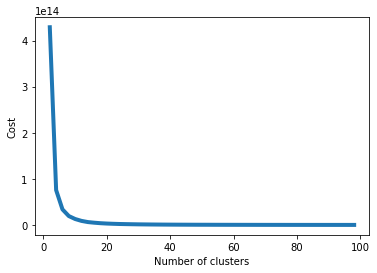

DONE


In [3]:
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 100, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
    print("DONE")
    
elbow(df)

In [4]:
X0 = df.loc[:, df.columns != 'SALE PRICE'] 
Y0 = df['SALE PRICE'] 
trainX, testX, trainY, testY = model_selection.train_test_split(X0, Y0, test_size=0.30) 

In [5]:
knnm = KMeans(n_clusters=10)
knnm.fit(X0)

KMeans(n_clusters=10)

In [6]:
# predict the clusters for the data
y_pred = knnm.predict(testX)

# calculate Silhouette score for the clustering
silhouette = silhouette_score(testX, testY)

# print Silhouette score
print(f"Silhouette score: {silhouette:.2f}")

Silhouette score: -0.37
